In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense 
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox
from collections import OrderedDict
from sklearn import preprocessing
from tukey_outliers_helper import TukeyOutliersHelper
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

# Load Data...

In [2]:
wines = pd.read_csv('winequality.csv', delimiter=';')

In [3]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


## Correct the missing or problem values

In [5]:
def correctValues(x):
    if len(x) > 5:
        return (np.nan)
    else:
        return(pd.to_numeric(x))
def coloWine(x):
    if x == 'White':
        return(0)
    else:
        return (1)

In [6]:
aa = wines['alcohol'].apply(correctValues)
wines['alcohol'] = aa.values
wines.dropna(inplace=True)

In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null object
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 706.2+ KB


In [8]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000
mean,7.219475,0.339684,0.318795,5.445973,0.056081,30.495586,115.690801,1.715329,3.218592,0.531169,10.489083,5.817098
std,1.294910,0.164690,0.145506,4.764308,0.035110,17.757007,56.595196,7.659497,0.160845,0.148870,1.192961,0.874125
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


## Set an column representing the type of wine

In [10]:
wines['color'] = wines['type'].apply(coloWine)

In [11]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


# Graph some distributions...

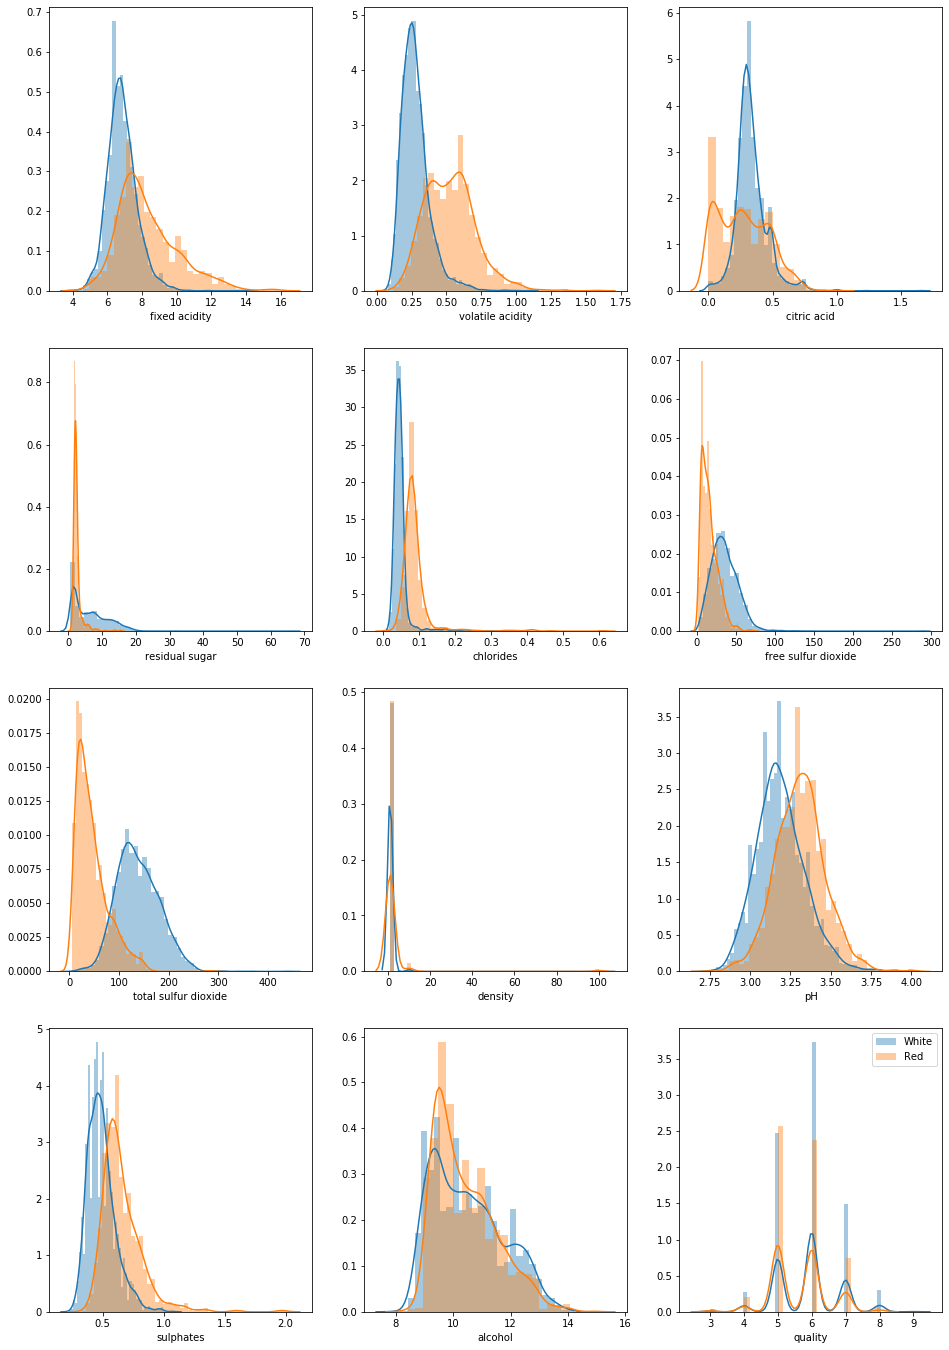

In [13]:
redWines = wines[wines['type'] == 'Red']
whiteWines = wines[wines['type'] == 'White']
dfPLot = wines.drop(['type', 'color'], axis = 1)
fig = plt.figure(figsize=(16,24))
features = dfPLot.columns

for i in range(len(features)):
    ax1 = fig.add_subplot(4,3,i+1)
    sns.distplot(whiteWines[features[i]], label='White')
    sns.distplot(redWines[features[i]], label='Red')
plt.legend()

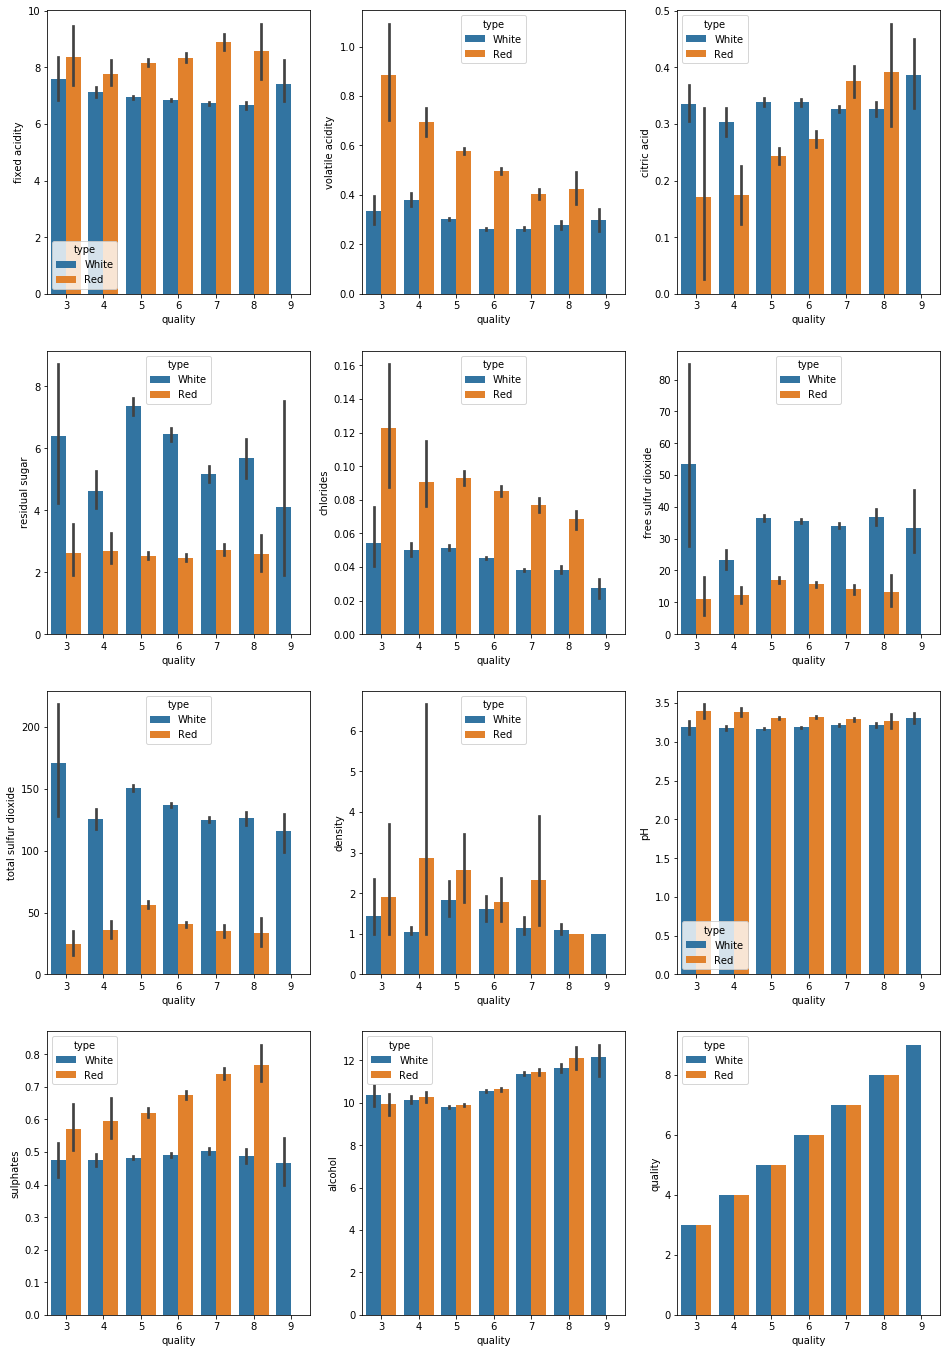

In [14]:
dfPLot = wines.drop(['type', 'color'], axis = 1)
fig = plt.figure(figsize=(16,24))
features = dfPLot.columns

for i in range(len(features)):
    ax1 = fig.add_subplot(4,3,i+1)
    sns.barplot(x='quality', y=features[i],data=wines, hue='type')

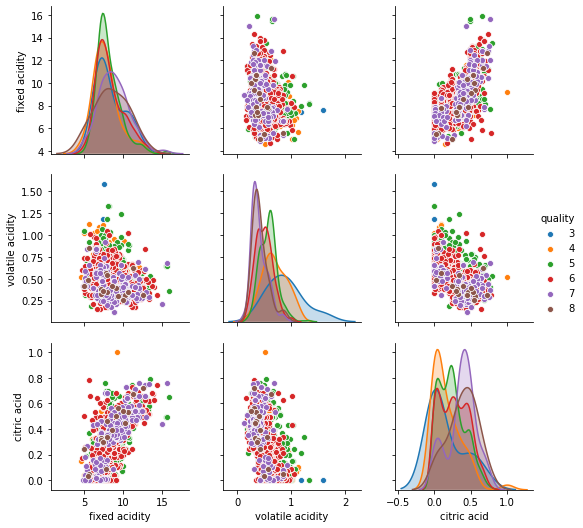

In [15]:
relationship = sns.pairplot(redWines, vars=['fixed acidity','volatile acidity','citric acid'], hue='quality')
plt.show(relationship)

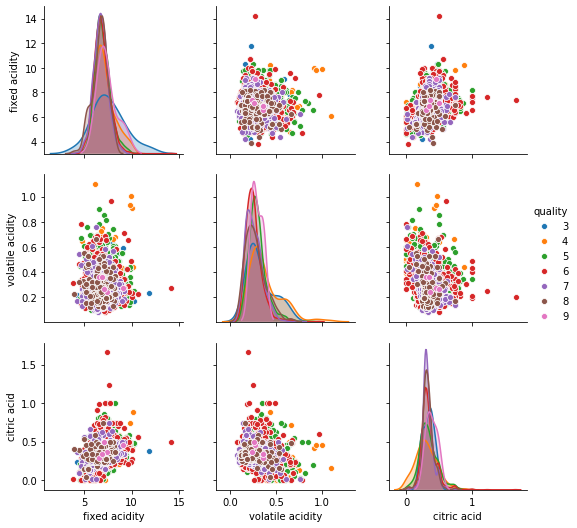

In [16]:
relationship = sns.pairplot(whiteWines, vars=['fixed acidity','volatile acidity','citric acid'], hue='quality')
plt.show(relationship)

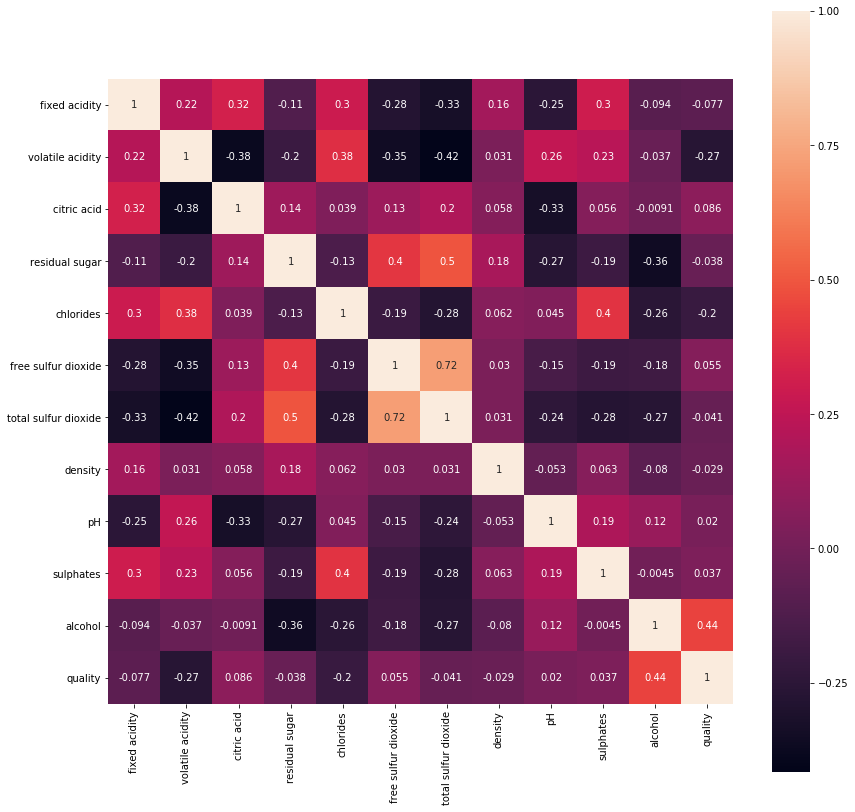

In [17]:
plt.figure(figsize=(14,14))
sns.heatmap(wines.iloc[:,0:-1].corr(), cbar = True,  square = True, annot=True)

 - Nos vinhos tintos, a acidez volátil decresce com a qualidade
 - Ambos tinto e branco, os cloridos, que se resume em a quantidade de sal, decrescem com a qualidade
 - Há um aumento da quantidade de álcool com o aumento da qualidade em ambos os tipos de vinho
 - os níveis de acido cítrico também aumentam com a qualidade para os vinhos tintos
 - Os sulfatos apresentam um valor maior para vinhos tintos com qualidade maior

In [89]:
XX = redWines.drop(labels=['quality', 'type', 'color'], axis=1)
XX.shape

(1593, 11)

In [91]:
yy = redWines['quality']
available_classes = np.unique(yy)

In [175]:
seed = 160184
random_state = np.random.RandomState(seed=seed)
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=32)

In [176]:
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import f1_score
models = OrderedDict()

def score_classifier(y_true, y_pred):
    return f1_score(
        y_true, y_pred,
        average='macro', #Calculate metrics for each label, and find their unweighted mean.
        #This does not take label imbalance into account.
    )

## Gaussian Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
preds = model.predict(X_test)

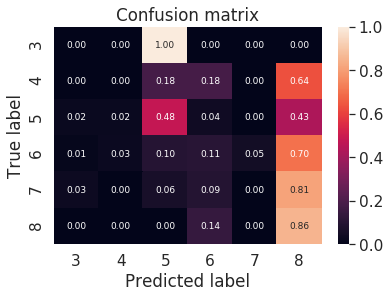

In [179]:
plot_confusion_matrix(y_true=y_test, y_pred=preds, normalized=True, classes=available_classes)
plt.show()

In [180]:
print ("score of gaussian naive bayes")
score_classifier(y_test, preds)

score of gaussian naive bayes


0.1382190344628152

In [181]:
models['naive_bayes'] = model

## Quadratic Discriminant Analysis

In [182]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [183]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

/home/jose/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/jose/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [184]:
preds = model.predict(X_test)

In [185]:
print ("score for QDA")
score_classifier(y_true=y_test, y_pred=preds)

score for QDA


/home/jose/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2965273183564571

In [186]:
models['qda'] = model

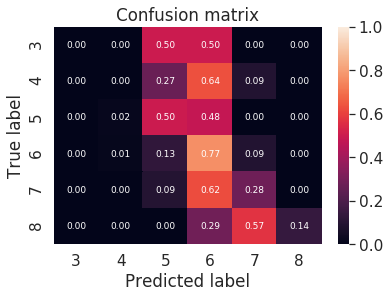

In [187]:
plot_confusion_matrix(y_true=y_test, y_pred=preds, normalized=True, classes=available_classes)
plt.show()

## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
model = LogisticRegression(C=0.05,solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

/home/jose/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
print ("score for Logistic Regression")
score_classifier(y_true=y_test, y_pred=preds)

score for Logistic Regression


/home/jose/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.1968231501140206

In [193]:
models['logistic_regression'] = model

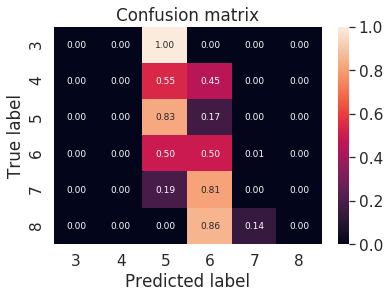

In [194]:
plot_confusion_matrix(y_true=y_test, y_pred=preds, normalized=True, classes=available_classes)
plt.show()

In [195]:
models.keys()

odict_keys(['naive_bayes', 'qda', 'logistic_regression'])

In [196]:
%%time
for key, model in models.items():
    print (key)
    inputs, targets = (X_train, y_train) if key == 'knn' else \
        (X_train, y_train)
    model.fit(inputs, targets)

naive_bayes
qda
logistic_regression


/home/jose/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/jose/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/jose/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 1.8 s, sys: 1.85 s, total: 3.65 s
Wall time: 353 ms


In [197]:
score_dict = OrderedDict([( key, score_classifier(
                y_true=y_test, y_pred=model.predict(X_test) if key == 'knn' else model.predict(X_test)) )
                          for (key, model) in models.items()])
score_dict

/home/jose/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jose/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


OrderedDict([('naive_bayes', 0.1382190344628152),
             ('qda', 0.2965273183564571),
             ('logistic_regression', 0.1968231501140206)])

In [198]:
df = pd.DataFrame(index=score_dict.keys(), data=score_dict.values(), columns=['score'])
df.shape

(3, 1)

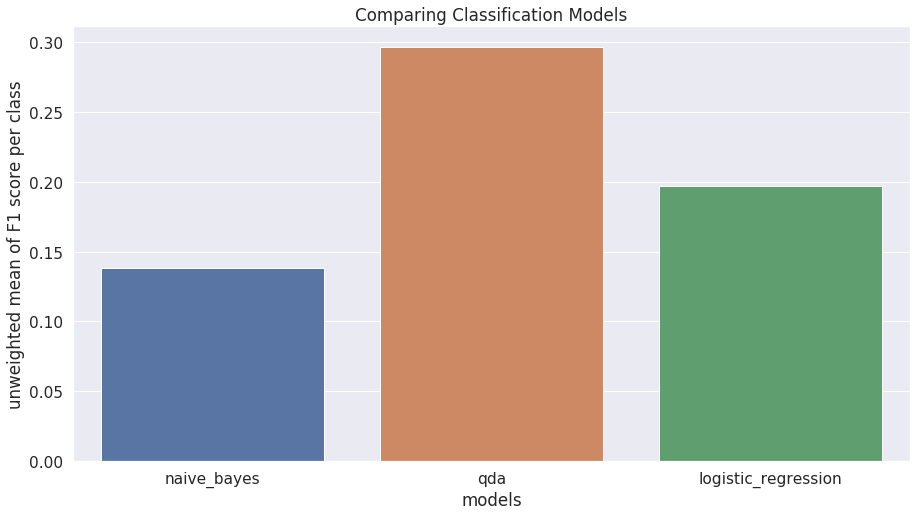

In [199]:

plt.figure(figsize=(15,8))
sns.barplot(x=df.index, y=df['score'])
plt.ylabel('unweighted mean of F1 score per class')
plt.xlabel('models')
plt.title('Comparing Classification Models')
plt.show()